# Mount G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [ ]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import numpy as np
import zipfile
import glob
import os

# Coding Some Utilities

In [ ]:
def loadImage(src_path):
  # Read the image
  img = Image.open(src_path).resize((256, 256))

  # Rotate image if it has an exif tag
  img = ImageOps.exif_transpose(img)
  np_image = np.array(img)

  # If the number of channels is 1, then convert it into 3 channeled image  
  if(len(np_image.shape) < 3):
    np_image = np.stack([np_image]*3, axis=2)
  elif np_image.shape[2] > 3:
    np_image = np_image[:,:,:3]

  return np_image

def crop_and_save_faces(image, face_boxes, target_folder_path, base_image_name):
  i = 1
  for (x, y, w, h) in face_boxes:
    # Crop the region of interest i.e. face
    cropped_image = image[y:y+h, x:x+w]
    cropped_image = Image.fromarray(cropped_image)
    cropped_image = cropped_image.resize((128, 128))

    # Save the cropped image in target folder
    filename, ext = os.path.splitext(base_image_name)
    new_filename = f"{filename}_{i}.{ext}" 
    target_filepath = os.path.join(target_folder_path, new_filename) 
    cropped_image.save(target_filepath)
    i += 1


def draw_bounding_boxes(image, bounding_boxes):
  color = (255, 255, 0)  # Yellow color
  for (x, y, w, h) in bounding_boxes:
    cv2.rectangle(image, (x, y), (x + w, y + h), color,2)

# Extracting Faces from the training images 

In [ ]:
BASE_FOLDER = "/content/drive/MyDrive/AI Project/team_images/"
TARGET_FOLDER = "cropped_images_team/train"

In [ ]:
!rm -r $TARGET_FOLDER

In [ ]:
# Get the Cascade Classifier from OpenCv
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
np_images = []
classes = []
for dirname in os.listdir(BASE_FOLDER):
  source_class_path = os.path.join(BASE_FOLDER, dirname)

  # Create the target directory if not exists
  target_class_path = os.path.join(TARGET_FOLDER, dirname)
  if not os.path.exists(target_class_path):
    os.makedirs(target_class_path)

  for filename in os.listdir(source_class_path):
    
    # Load the image
    image_path = os.path.join(source_class_path, filename)
    image = loadImage(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces  
    face_boxes = face_cascade.detectMultiScale(gray, 1.05, 6)

    # Crop and save faces in target folder
    crop_and_save_faces(image, face_boxes, target_class_path, filename)

    # Draw the bounding boxes on a copy of image
    image_copy = image.copy()
    draw_bounding_boxes(image_copy, face_boxes)
        
    # Store the bounding box image in the array
    np_images.append(image_copy)
    classes.append(dirname)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 34853 had too many entries: 9, expected 1
  % (tag, len(values))


In [ ]:
len(np_images)

32

## Visualizing the results

In [ ]:
n = len(np_images)
rows = np.ceil(n/5)
indices = np.arange(0, len(np_images))
plotNo = 1
plt.figure(figsize=(20, 4*rows))
for i in indices:
  plt.subplot(rows, 5, plotNo)
  plt.imshow(np_images[i])
  plt.title(classes[i])
  plotNo += 1

Output hidden; open in https://colab.research.google.com to view.

# Extracting Faces from the validation images 

In [ ]:
BASE_FOLDER = "/content/drive/MyDrive/AI Project/team_images_test/"
TARGET_FOLDER = "cropped_images_team/val/"

In [ ]:
!rm -r $TARGET_FOLDER

In [ ]:
# Get the Cascade Classifier from OpenCv
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
np_images = []
classes = []
for dirname in os.listdir(BASE_FOLDER):
  source_class_path = os.path.join(BASE_FOLDER, dirname)

  # Create the target directory if not exists
  target_class_path = os.path.join(TARGET_FOLDER, dirname)
  if not os.path.exists(target_class_path):
    os.makedirs(target_class_path)

  for filename in os.listdir(source_class_path):
    
    # Load the image
    image_path = os.path.join(source_class_path, filename)
    image = loadImage(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces  
    face_boxes = face_cascade.detectMultiScale(gray, 1.05, 6)

    # Crop and save faces in target folder
    crop_and_save_faces(image, face_boxes, target_class_path, filename)

    # Draw the bounding boxes on a copy of image
    image_copy = image.copy()
    draw_bounding_boxes(image_copy, face_boxes)
        
    # Store the bounding box image in the array
    np_images.append(image_copy)
    classes.append(dirname)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 34853 had too many entries: 9, expected 1
  % (tag, len(values))


In [ ]:
len(np_images)

16

## Visualizing the results

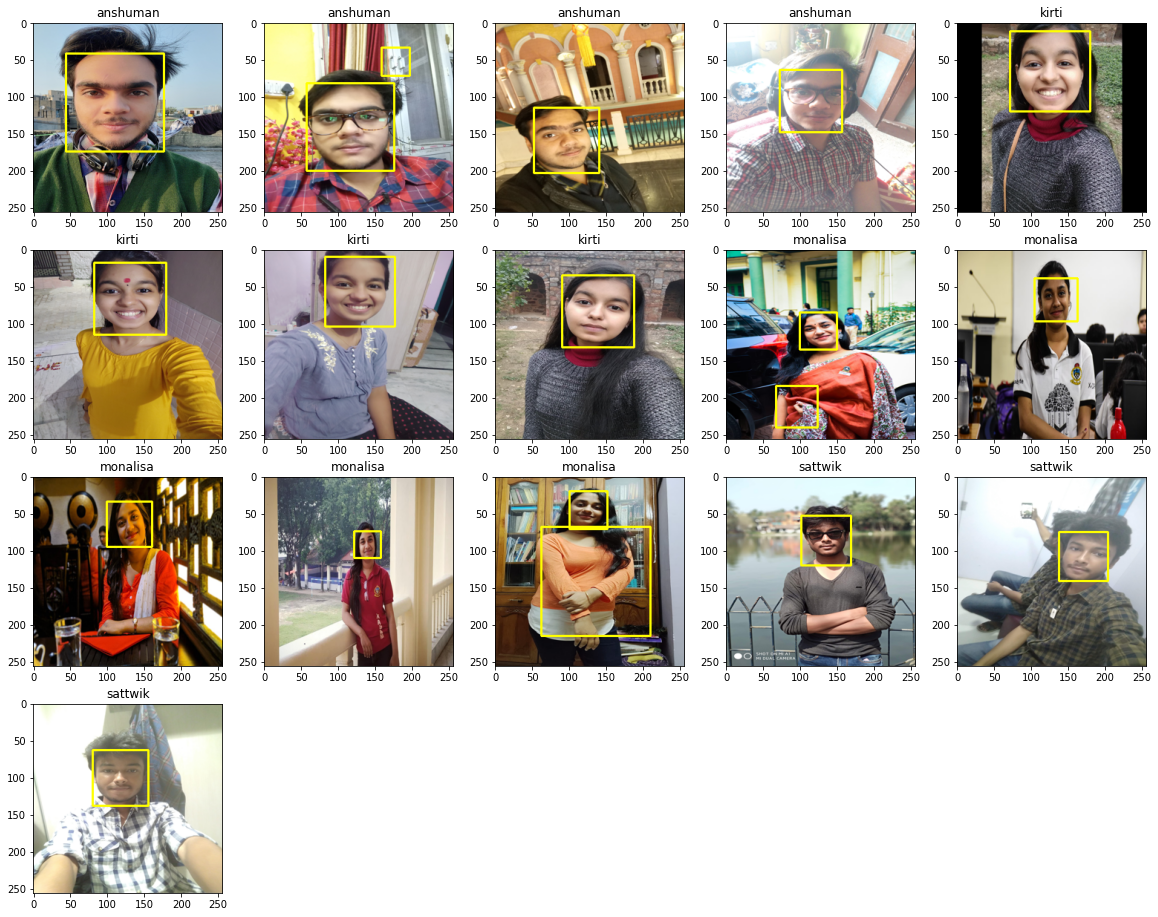

In [ ]:
n = len(np_images)
rows = np.ceil(n/5)
indices = np.arange(0, len(np_images))
plotNo = 1
plt.figure(figsize=(20, 4*rows))
for i in indices:
  plt.subplot(rows, 5, plotNo)
  plt.imshow(np_images[i])
  plt.title(classes[i])
  plotNo += 1

# Copy the cropped images folder into drive

In [ ]:
import shutil

In [ ]:
shutil.copytree('./cropped_images_team', '/content/drive/MyDrive/AI Project/cropped_images_team/')

'/content/drive/MyDrive/AI Project/cropped_images_team/'